# Life expectancy and GDP analysis

## Load and explore data

In [2]:
#load data
import pandas as pd

df = pd.read_csv('all_data.csv')

In [7]:
#get general information
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [11]:
#no missing data and values seem to be the right data types

In [10]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [8]:
#get unique countries
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [9]:
#get unique years
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [15]:
#do all countries have the same years? If 96 (same num rows), most likely yes
len(df.Country.unique()) * len(df.Year.unique())

96

## Begin to answer questions
<ol>
    <li>Has life expectancy increased over time in the six nations?</li>
<li>Has GDP increased over time in the six nations?</li>
    
<li>Is there a correlation between GDP and life expectancy of a country?</li>
<li>What is the average life expectancy in these nations?</li>
    <li>What is the distribution of that life expectancy?</li></ol>

### Has life expectancy increased over time in the six nations?

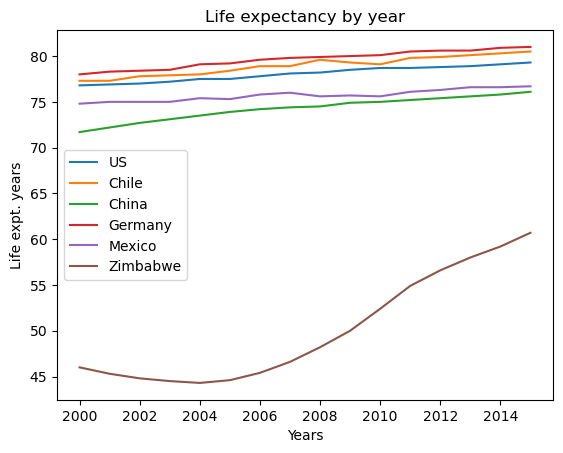

In [29]:
#graph the live expectancy for nations over time
import matplotlib.pyplot as plt
import seaborn as sns

years = df.Year.unique()
expt_us = df[df['Country']=='United States of America']['Life expectancy at birth (years)']
expt_chil = df[df['Country']=='Chile']['Life expectancy at birth (years)']
expt_china = df[df['Country']=='China']['Life expectancy at birth (years)']
expt_ger = df[df['Country']=='Germany']['Life expectancy at birth (years)']
expt_mex = df[df['Country']=='Mexico']['Life expectancy at birth (years)']
expt_zim = df[df['Country']=='Zimbabwe']['Life expectancy at birth (years)']

plt.plot(years,expt_us,label='US')
plt.plot(years,expt_chil,label='Chile')
plt.plot(years,expt_china,label='China')
plt.plot(years,expt_ger,label='Germany')
plt.plot(years,expt_mex,label='Mexico')
plt.plot(years,expt_zim,label='Zimbabwe')

plt.title('Life expectancy by year')
plt.ylabel('Life expt. years')
plt.xlabel('Years')

plt.legend()
plt.show()

Based on the graph, we can see that generally, life expectancy has grown over time for each nation. Since this includes some outlier values, its difficult to see the actual increase so im going to get the % increases from 2000 to 2014 for each nation. Its also interesting to note that only some countries had dips in expectancies (maybe come back to this)

In [52]:
#get % increase in expecatancy over 14 years for each nation
countries  =df.Country.unique()
master_list=[]
for c in countries:
    c_list =[]
    c_list.append(c)
    two_expt = df.loc[(df['Country']==c)&(df['Year']==2000),'Life expectancy at birth (years)'].item()
    #c_list.append(two_expt)
    twofour_expt = df.loc[(df['Country']==c)&(df['Year']==2014),'Life expectancy at birth (years)'].item()
    #c_list.append(twofour_expt)
    perc_change = (twofour_expt - two_expt) / two_expt
    c_list.append(round(perc_change*100,2))
    master_list.append(c_list)
master_list


[['Chile', 3.88],
 ['China', 5.72],
 ['Germany', 3.72],
 ['Mexico', 2.41],
 ['United States of America', 2.99],
 ['Zimbabwe', 28.7]]

impressive to see Zimbabwe with almost a 30% increase in life expectancy! Also interesting to see the US at the middle of pack

### Has GDP increased over time in the six nations?

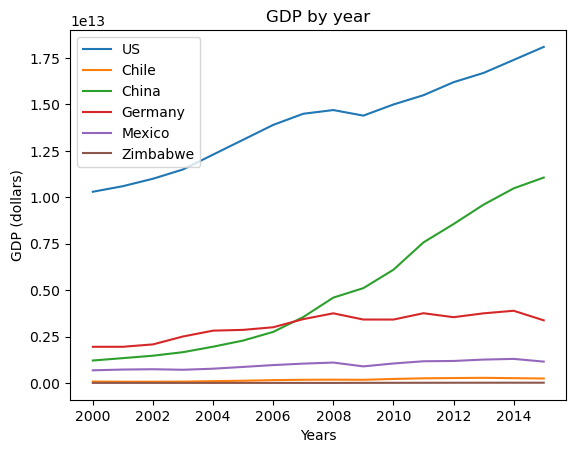

In [44]:
#graph gdp increase over time

years = df.Year.unique()
gdp_us = df[df['Country']=='United States of America']['GDP']
gdp_chil = df[df['Country']=='Chile']['GDP']
gdp_china = df[df['Country']=='China']['GDP']
gdp_ger = df[df['Country']=='Germany']['GDP']
gdp_mex = df[df['Country']=='Mexico']['GDP']
gdp_zim = df[df['Country']=='Zimbabwe']['GDP']

plt.plot(years,gdp_us,label='US')
plt.plot(years,gdp_chil,label='Chile')
plt.plot(years,gdp_china,label='China')
plt.plot(years,gdp_ger,label='Germany')
plt.plot(years,gdp_mex,label='Mexico')
plt.plot(years,gdp_zim,label='Zimbabwe')

plt.title('GDP by year')
plt.ylabel('GDP (dollars)')
plt.xlabel('Years')

plt.legend()
plt.show()

Looks like China and the US are far above the rest making the other countries difficult to evaluate. Splitting the other nations into their own graph 

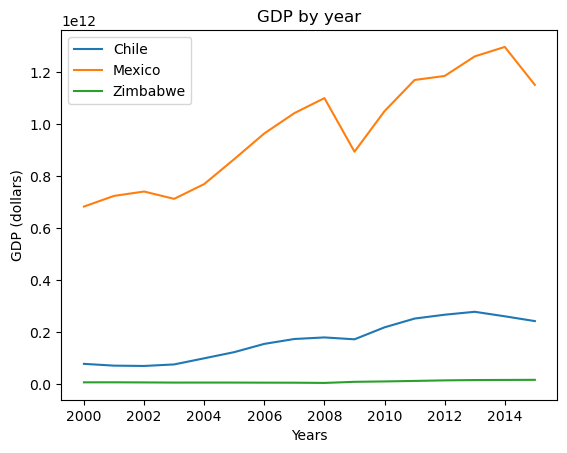

In [46]:
#Everyone but US,china, and germany

years = df.Year.unique()
#gdp_us = df[df['Country']=='United States of America']['GDP']
gdp_chil = df[df['Country']=='Chile']['GDP']
#gdp_china = df[df['Country']=='China']['GDP']
#gdp_ger = df[df['Country']=='Germany']['GDP']
gdp_mex = df[df['Country']=='Mexico']['GDP']
gdp_zim = df[df['Country']=='Zimbabwe']['GDP']

#plt.plot(years,gdp_us,label='US')
plt.plot(years,gdp_chil,label='Chile')
#plt.plot(years,gdp_china,label='China')
#plt.plot(years,gdp_ger,label='Germany')
plt.plot(years,gdp_mex,label='Mexico')
plt.plot(years,gdp_zim,label='Zimbabwe')

plt.title('GDP by year')
plt.ylabel('GDP (dollars)')
plt.xlabel('Years')

plt.legend()
plt.show()

There is still a pretty big difference between some nations. Going to isolate Zimbabwe

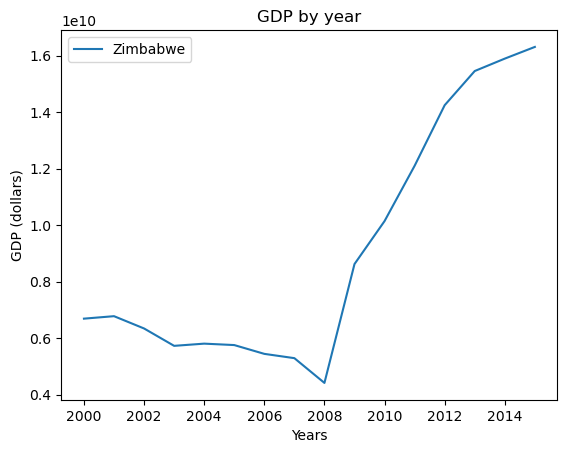

In [48]:
#Isolate Zimbabwe

years = df.Year.unique()
#gdp_us = df[df['Country']=='United States of America']['GDP']
#gdp_chil = df[df['Country']=='Chile']['GDP']
#gdp_china = df[df['Country']=='China']['GDP']
#gdp_ger = df[df['Country']=='Germany']['GDP']
#gdp_mex = df[df['Country']=='Mexico']['GDP']
gdp_zim = df[df['Country']=='Zimbabwe']['GDP']

#plt.plot(years,gdp_us,label='US')
#plt.plot(years,gdp_chil,label='Chile')
#plt.plot(years,gdp_china,label='China')
#plt.plot(years,gdp_ger,label='Germany')
#plt.plot(years,gdp_mex,label='Mexico')
plt.plot(years,gdp_zim,label='Zimbabwe')

plt.title('GDP by year')
plt.ylabel('GDP (dollars)')
plt.xlabel('Years')

plt.legend()
plt.show()

Theres the data!

In [53]:
#get % increase in GDP over 14 years for each nation
countries  =df.Country.unique()
master_list=[]
for c in countries:
    c_list =[]
    c_list.append(c)
    two_expt = df.loc[(df['Country']==c)&(df['Year']==2000),'GDP'].item()

    twofour_expt = df.loc[(df['Country']==c)&(df['Year']==2014),'GDP'].item()
    
    perc_change = (twofour_expt - two_expt) / two_expt
    c_list.append(round(perc_change*100,2))
    master_list.append(c_list)
master_list

[['Chile', 235.2],
 ['China', 765.35],
 ['Germany', 99.52],
 ['Mexico', 89.93],
 ['United States of America', 68.93],
 ['Zimbabwe', 137.54]]

### Is there a correlation between GDP and life expectancy of a country?

<AxesSubplot:xlabel='GDP', ylabel='Life expectancy at birth (years)'>

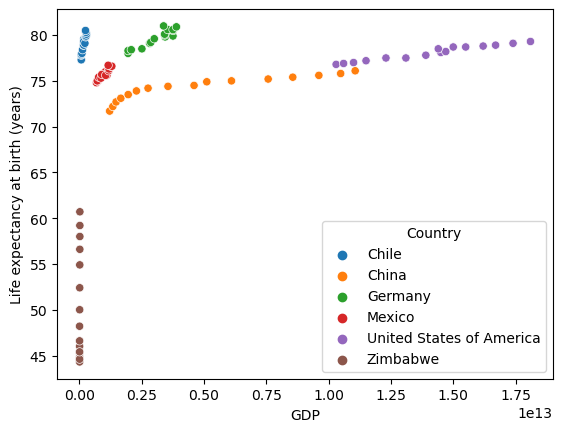

In [62]:
#Look at scatter plot of gdp and expectancy

sns.scatterplot(data=df,x=df['GDP'],y=df['Life expectancy at birth (years)'], hue=df['Country'])

<AxesSubplot:xlabel='Life expectancy at birth (years)', ylabel='GDP'>

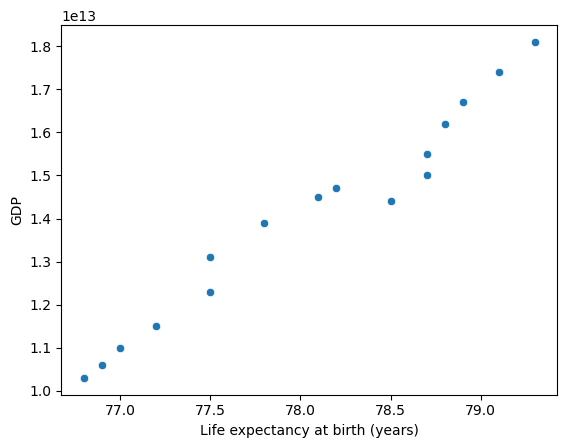

In [56]:
#The combined graph is a little weird, going to lookat individual countries

#USA
sns.scatterplot(data=df,x=expt_us ,y=gdp_us)

<AxesSubplot:xlabel='Life expectancy at birth (years)', ylabel='GDP'>

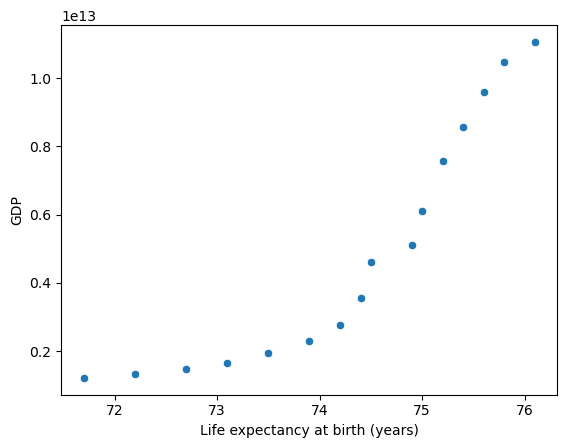

In [58]:
#Zim
sns.scatterplot(data=df,x=expt_china ,y=gdp_china)

It generally seems like GDP and Life expectancy are postively coorlated 

### What is the average life expectancy in these nations?

In [69]:
#get % increase in expecatancy over 14 years for each nation
import numpy as np
countries  =df.Country.unique()
master_list=[]
for c in countries:
    c_list =[]
    c_list.append(c)
    two_expt = df.loc[(df['Country']==c)&(df['Year']==2000),'Life expectancy at birth (years)'].item()
    c_list.append(two_expt)
    twofour_expt = df.loc[(df['Country']==c)&(df['Year']==2014),'Life expectancy at birth (years)'].item()
    c_list.append(twofour_expt)
    master_list.append(c_list)

latest_list=[]
early_list=[]
for y in master_list:
    early_list.append(y[1])
    latest_list.append(y[2])
print('avg expectancy in 2000 ' + str(round(np.average(early_list),2)))
print('avg expectancy in 2014 ' + str(round(np.average(latest_list),2)))


avg expectancy in 2000 70.77
avg expectancy in 2014 75.32


### What is the distribution of that life expectancy

<AxesSubplot:xlabel='Life expectancy at birth (years)', ylabel='Count'>

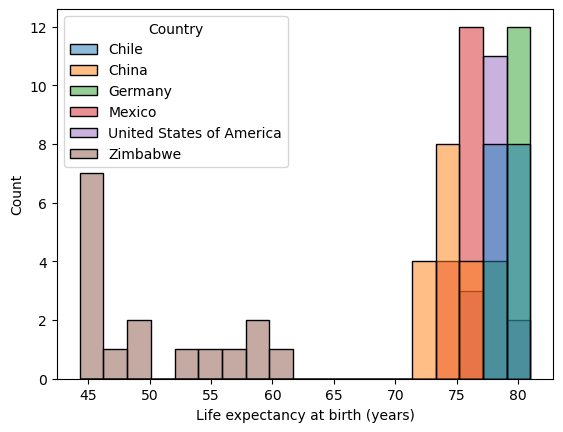

In [73]:
sns.histplot(data=df,x=df['Life expectancy at birth (years)'], hue=df['Country'])